# Campus Recruitment


* Ariadne Sandoval
* Diego Pinto
* Eduardo Cariel
* Felipe Leiva
* Gabriel Moya

Prof: Francisco Alfaro

### ***1.- Descripcion del problema***

El tema a tratar es "Campus Recruitment", el cual determina si un estudiante se ubica en función de varias características.
El "reclutamiento en el campus" es un programa que se lleva a cabo dentro de las universidades u otras instituciones educativas para proporcionar trabajo a los estudiantes que se acercan a la finalización de sus estudios. 


La Universidad XYZ quiere construir un modelo de aprendizaje automático para saber dónde se ubicará al estudiante o no. Para que puedan brindarles una atención especial y ayudarlos a conseguir trabajo. El conjunto de datos dado se puede considerar como un problema de clasificación o regresión. En este proyecto, nos centraremos en el problema de clasificación, donde la tarea es encontrar dónde se ubicará el candidato o no. Este es un problema de clasificación binaria.

Este conjunto de datos consta de datos de ubicación de los estudiantes en el campus. Incluye porcentaje y especialización de secundaria y bachillerato. También incluye especialización de grado, tipo y experiencia laboral y ofertas salariales a los estudiantes colocados. 
La descripción de las variables es la siguiente:



* sl_no : Número de serie
* gender : Género del candidato ->'M','F'
* degree_t : Tipo de grado - Campo laboral
* workex : Experiencia laboral
* status : Estado de la ubicación: Placed / Not placed
* salary : Salario ofrecido por empresa a candidatos 
* specialisation : Posgrado (MBA) - Especialización

* ssc_p : SSC (10º) Porcentaje
* ssc_b : SSC Board of Education --> Central (or) Others
* hsc_p : porcentaje de HSC (12º)
* hsc_b : Consejo de Educación de HSC -> Central / Otros
* hsc_s : Especialización en HSC
* degree_p : Porcentaje de grados
* etest_p : Porcentaje de la prueba de empleabilidad (realizada por la universidad)
* mba_p : Porcentaje de MBA

Las preguntas que motivan esta proyecto son:
* ¿Qué factor influyó en un candidato para ser escogido?
* ¿Importa el porcentaje para que uno se escoja?
* ¿Qué grado de especialización es muy demandado por las empresas?

In [1]:
#pip install RISE

In [2]:
#@title metrics
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


def summary_metrics(df) -> pd.DataFrame:
    """
    Aplicar las distintas metricas definidas
    :param df:  dataframe con las columnas: ['y','yhat']
    :return: dataframe con las metricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']
    df_result['accuracy'] = [round(accuracy_score(y_true,y_pred),4)]
    df_result['recall'] = [round(recall_score(y_true,y_pred, average="macro"),4)]
    df_result['precision'] = [round(precision_score(y_true,y_pred, average="macro"),4)]
    df_result['fscore'] = [round(f1_score(y_true,y_pred, average="macro"),4)]


    return df_result

In [3]:
#@title librerias
# librerias 
import os
import pandas as pd
import numpy as np 
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from numpy import arange
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import mean_squared_error,r2_score
# machine learning
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score,recall_score,precision_score

#escribir metricas

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


In [4]:
#@title data
 #mnt google-drive
#from google.colab import drive
#drive.mount('/content/gdrive')
#root_path = 'gdrive/My Drive/Proyecto_aplica_g3/'

### ***2.- Estadistica descriptiva***

En esta sección revisaremos la forma que tiene la data
y buscaremos caracteristicas importantes de esta basados en analisi descriptivo y visual

In [5]:
#data = pd.read_csv(root_path + 'Placement_Data_Full_Class.csv', sep=',')
data = pd.read_csv(os.path.join("Placement_Data_Full_Class.csv"), sep=",")
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [6]:
data.describe

<bound method NDFrame.describe of      sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sci&Te

De aqui, podemos sacar que aparecen muchos valores NaN en la data por lo que limpiaremos la data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [8]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

Tal como se habia visto la data tiene 67 datos Nan, lo que corresponde al 31,16% de la data.Todos ellos en la columna salary, revisando la data se puede ver que los valores NaN de salary estan relacionados a status no placed, por lo que a cada valor NaN se le agregará un valor cero para no perder los datos.

Además para el modelo de entrenamiento o en EDA, no es necesaria la variable sl_no, por lo tanto se eliminará.
Despues del EDA, de ser necesario se volverá a poner.

In [9]:
data_n = data.fillna(0)
data_n = data_n.drop(['sl_no'], axis=1)
data_n.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [10]:
data_n.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [11]:
data_n.shape

(215, 14)

In [12]:
data_n.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

Hemos arreglamos los valores Nan de la data. 
Ahora verificaremos que los diferentes valores sean únicos en las características categóricas. 

In [13]:
cat_cols=["gender","ssc_b","hsc_b","hsc_s","degree_t","workex","specialisation","status"]
for i in cat_cols:
    print(i,data_n[i].unique())

gender ['M' 'F']
ssc_b ['Others' 'Central']
hsc_b ['Others' 'Central']
hsc_s ['Commerce' 'Science' 'Arts']
degree_t ['Sci&Tech' 'Comm&Mgmt' 'Others']
workex ['No' 'Yes']
specialisation ['Mkt&HR' 'Mkt&Fin']
status ['Placed' 'Not Placed']


### ***3.- Visualización descriptiva***
Para esta sección crearemos distintos gráficos para visualizar la data, para ello se separará entre gráficos cualitativos y cuantitativos.

### 3.1.   *Datos cualitativos*



Text(0.5, 1.0, 'Status of placement')

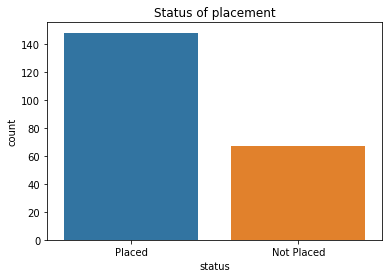

In [14]:
# Status of placement 
sns.countplot('status', data=data_n).set_title('Status of placement')

Text(0.5, 1.0, 'Candidate gender')

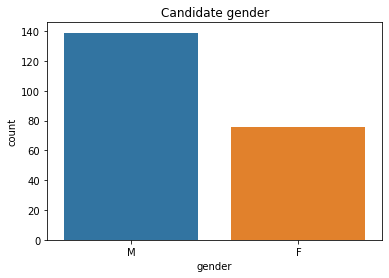

In [15]:
#Candidate gender 
sns.countplot('gender', data=data_n).set_title('Candidate gender')

In [16]:
#veamos si el genero afecta la ubicacion de los candidatos
data_n['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

In [17]:
df = pd.DataFrame(data_n.groupby(['gender','status'])['status'].count())
df

status
gender status            
F      Not Placed      28
       Placed          48
M      Not Placed      39
       Placed         100

Text(0.5, 1.0, 'Candidate gender  vs Status')

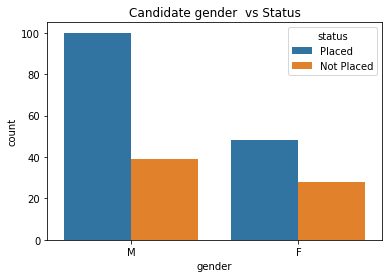

In [18]:
sns.countplot(x='gender', hue='status', data=data_n).set_title('Candidate gender  vs Status')

Se concluye que los machos tienen altas posibilidades de ser ubicados en comparación con las hembras. 

Text(0.5, 1.0, 'Work Experience')

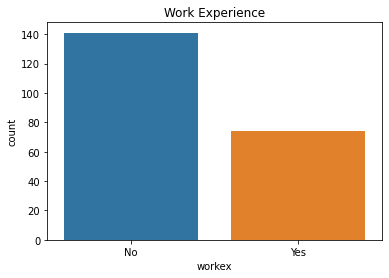

In [19]:
# work experience
sns.countplot('workex', data=data_n).set_title('Work Experience')

In [20]:
#De la misma forma veamos si la experiencia afecta la ubicacion de los candidatos
data_n['workex'].value_counts()

No     141
Yes     74
Name: workex, dtype: int64

In [21]:
df = pd.DataFrame(data_n.groupby(['workex','status'])['status'].count())
df

status
workex status            
No     Not Placed      57
       Placed          84
Yes    Not Placed      10
       Placed          64

Text(0.5, 1.0, 'Work Experience vs Status')

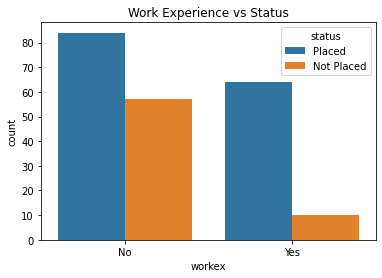

In [22]:
sns.countplot(x='workex', hue='status', data=data_n).set_title('Work Experience vs Status')

Está claro que los candidatos con experiencia laboral tienen más posibilidades de ser colocados. 

Text(0.5, 1.0, 'Post Graduation(MBA)')

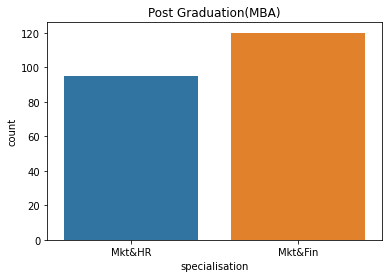

In [23]:
#Post Graduation(MBA)- Specialization
sns.countplot('specialisation', data=data_n).set_title('Post Graduation(MBA)')

In [24]:
# MBA Specialization
data_n['specialisation'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [25]:
df = pd.DataFrame(data_n.groupby(['specialisation','status'])['status'].count())
df

status
specialisation status            
Mkt&Fin        Not Placed      25
               Placed          95
Mkt&HR         Not Placed      42
               Placed          53

Text(0.5, 0, 'MBA Specialization')

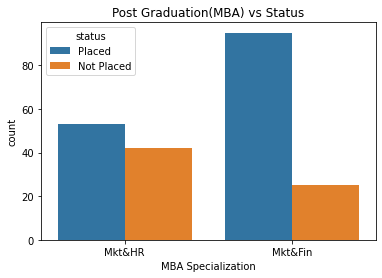

In [26]:
sns.countplot(x='specialisation', hue='status', data=data_n).set_title('Post Graduation(MBA) vs Status')
plt.xlabel('MBA Specialization')

No se logra concluir nada sobre la especializaciónn dada la homogeneidad de los datos. Sin embargo se ve una tendencia hacia MTK&fin.

Text(0.5, 1.0, 'Degree type- Field of degree education')

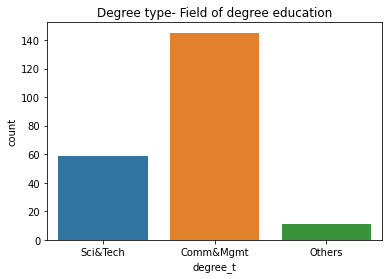

In [27]:
# Degree type - Field of degree education
sns.countplot('degree_t', data=data_n).set_title('Degree type- Field of degree education')

In [28]:
#Degree Type
data_n['degree_t'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [29]:
df = pd.DataFrame(data_n.groupby(['degree_t','status'])['status'].count())
df

status
degree_t  status            
Comm&Mgmt Not Placed      43
          Placed         102
Others    Not Placed       6
          Placed           5
Sci&Tech  Not Placed      18
          Placed          41

Text(0.5, 1.0, 'Degree type vs Status')

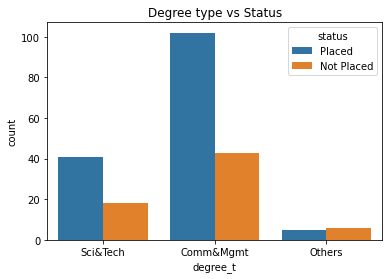

In [30]:
sns.countplot(x='degree_t', hue='status', data=data_n).set_title('Degree type vs Status')

Al igual que en la variable anterior no se logra concluir nada sobre el tipo de grado dado la homogeneidad de los datos. Sin embargo se aprecia una tendencia hacia Comm&Mgmt.

Text(0.5, 1.0, 'SSC Board of Education')

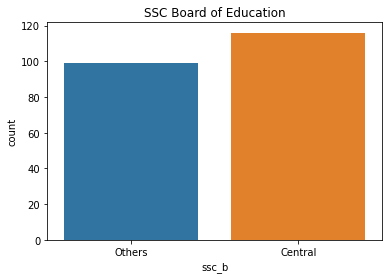

In [31]:
# SSC Board of Education
sns.countplot('ssc_b', data=data_n).set_title('SSC Board of Education')

In [32]:
#SSC Board
data_n['ssc_b'].value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

In [33]:
df = pd.DataFrame(data_n.groupby(['ssc_b','status'])['status'].count())
df

status
ssc_b   status            
Central Not Placed      38
        Placed          78
Others  Not Placed      29
        Placed          70

Text(0.5, 1.0, 'SSC Board of Education  vs Status')

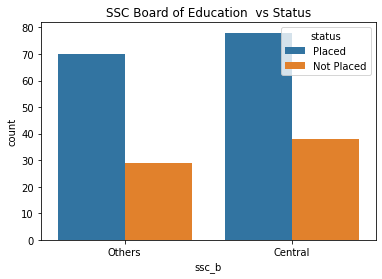

In [34]:
sns.countplot(x='ssc_b', hue='status', data=data_n).set_title('SSC Board of Education  vs Status')

Se puede extraer que, la junta de SSC no es importante para los reclutadores cuando se trata de contratar candidatos. Así que no será utilizado mientras se entrena el modelo.

Text(0.5, 1.0, 'HSC Board of Education')

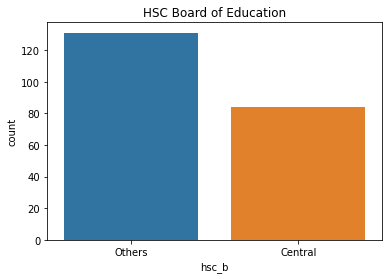

In [35]:
# HSC Board of Education 
sns.countplot('hsc_b', data=data_n).set_title('HSC Board of Education')

In [36]:
#HSC Board
data_n['hsc_b'].value_counts()

Others     131
Central     84
Name: hsc_b, dtype: int64

In [37]:
df = pd.DataFrame(data_n.groupby(['hsc_b','status'])['status'].count())
df

status
hsc_b   status            
Central Not Placed      27
        Placed          57
Others  Not Placed      40
        Placed          91

Text(0.5, 1.0, 'HSC Board of Education vs Status')

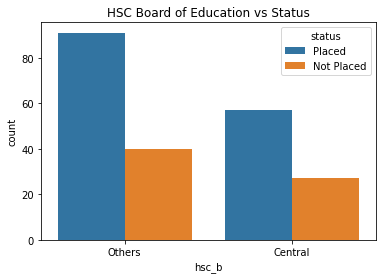

In [38]:
sns.countplot(x='hsc_b', hue='status', data=data_n).set_title('HSC Board of Education vs Status')

Al igual que el análisis anterior, HSC no es importante para los reclutadores cuando se trata de contratar candidatos. Así que no será utilizado mientras se entrena el modelo.

Text(0.5, 1.0, ' Specialization in HSC')

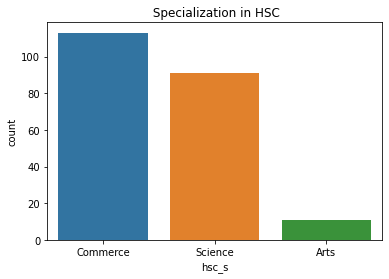

In [39]:
# Specialization in HSC
sns.countplot('hsc_s', data=data_n).set_title(' Specialization in HSC')

In [40]:
#HSC Specialisation
data_n['hsc_s'].value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

In [41]:
df = pd.DataFrame(data_n.groupby(['hsc_s','status'])['status'].count())
df

status
hsc_s    status            
Arts     Not Placed       5
         Placed           6
Commerce Not Placed      34
         Placed          79
Science  Not Placed      28
         Placed          63

Text(0.5, 1.0, 'Specialization in HSC vs Status')

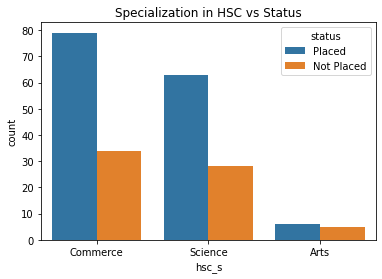

In [42]:
sns.countplot(x='hsc_s', hue='status', data=data_n).set_title('Specialization in HSC vs Status')

En modo de síntesis, de los datos cualitativos se puede señalar que:

*   Se conclute que los machos tienen altas posibilidades de ser ubicados en comparación con las hembras. 
*  Está claro que los candidatos con experiencia laboral tienen más posibilidades de ser colocados. 
*   Se puede extraer que, la junta de SSC no es importante para los reclutadores cuando se trata de contratar candidatos. Así que no será utilizado mientras se entrena el modelo.
*   Al igual que el análisis anterior, HSC no es importante para los reclutadores cuando se trata de contratar candidatos. Así que no será utilizado mientras se entrena el modelo.

### 3.2.   *Datos cuantitativos*

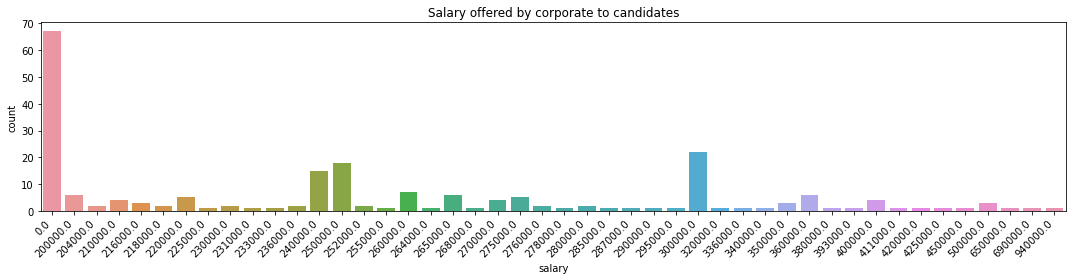

In [43]:
#Salary, quizás el factor más importante
plt.figure(figsize=(15,4))
ax = sns.countplot('salary', data=data_n)

ax.set_title('Salary offered by corporate to candidates')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Salary')

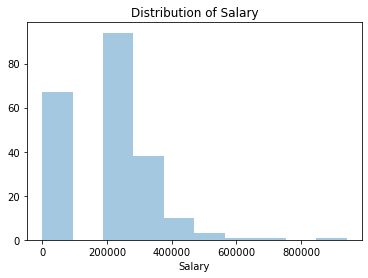

In [44]:
sns.distplot(data_n['salary'], kde=False)
plt.title('Distribution of Salary')
plt.xlabel('Salary')

Text(-15.450000000000003, 0.5, 'Salary')

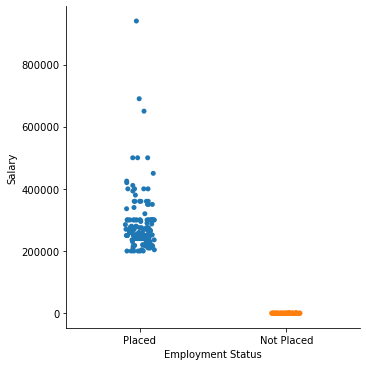

In [45]:
sns.catplot(y='salary', x='status', data=data_n)
plt.xlabel('Employment Status')
plt.ylabel('Salary')

Claramente no tenemos detalles sobre el salario del candidato no ubicado. La función de salario por sí sola es suficiente para clasificar el estado de ubicación del candidato (si el salario es> 0, entonces no se coloca). Sin embargo, si queremos usar solo la función de salario, entonces no necesitamos aprendizaje automático para eso, solo mirando nosotros podemos hacer eso. Es por esa razon que se eliminará esta columna mientras se realiza el entrenamiento del modelo de clasificación. 

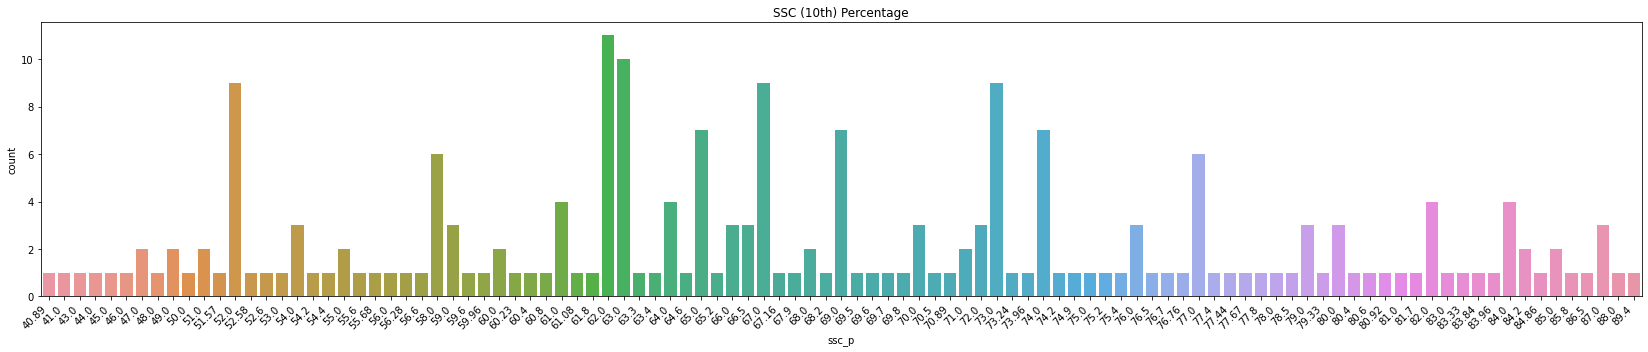

In [46]:
#SSC Percentage
plt.figure(figsize=(23,5))
ax = sns.countplot('ssc_p', data=data_n)

ax.set_title('SSC (10th) Percentage')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

Text(0.5, 0, 'SSC %')

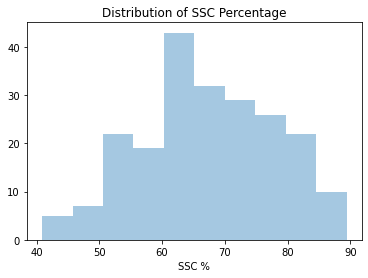

In [47]:
sns.distplot(data['ssc_p'], kde=False)
plt.title('Distribution of SSC Percentage')
plt.xlabel('SSC %')

Text(10.049999999999997, 0.5, 'SSC %')

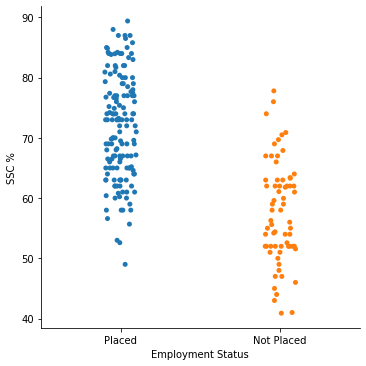

In [48]:
sns.catplot(y='ssc_p', x='status', data=data_n)
plt.xlabel('Employment Status')
plt.ylabel('SSC %')

Se concluye que los estudiantes que están ubicados tienen un porcentaje más alto en SSC. 

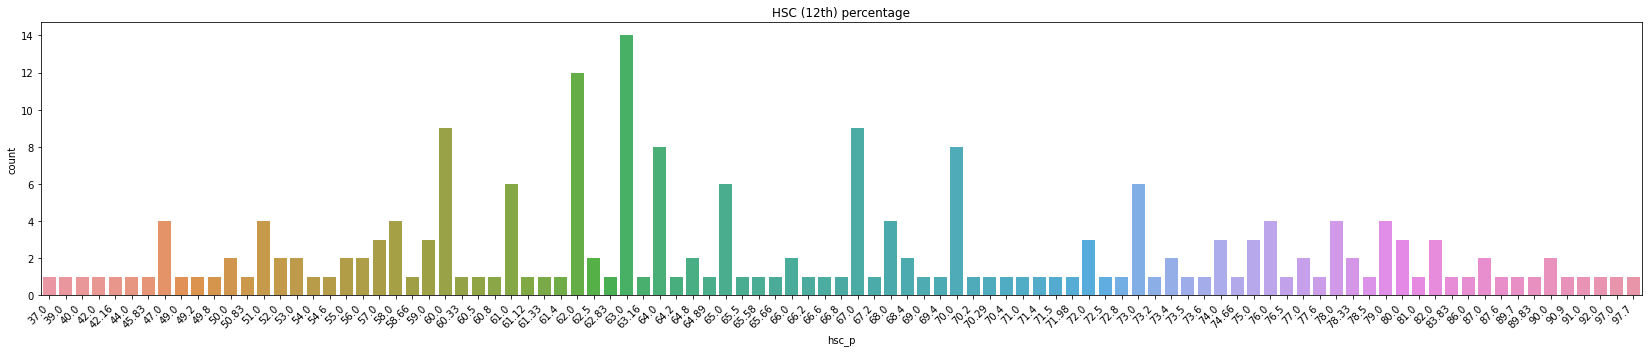

In [49]:
#HSC Percentage
plt.figure(figsize=(23,5))
ax = sns.countplot('hsc_p', data=data_n)

ax.set_title('HSC (12th) percentage')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

Text(0.5, 0, 'HSC %')

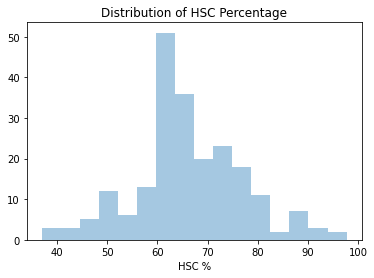

In [50]:
sns.distplot(data['hsc_p'], kde=False)
plt.title('Distribution of HSC Percentage')
plt.xlabel('HSC %')

Text(3.674999999999997, 0.5, 'HSC %')

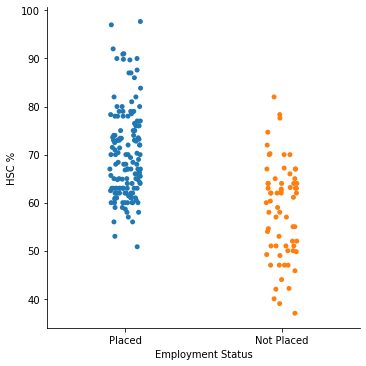

In [51]:
sns.catplot(y='hsc_p', x='status', data=data_n)
plt.xlabel('Employment Status')
plt.ylabel('HSC %')

Se tiene que el porcentaje de HSC es una característica importante. Ya que todos los estudiantes ubicados tienen porcentajes más altos.

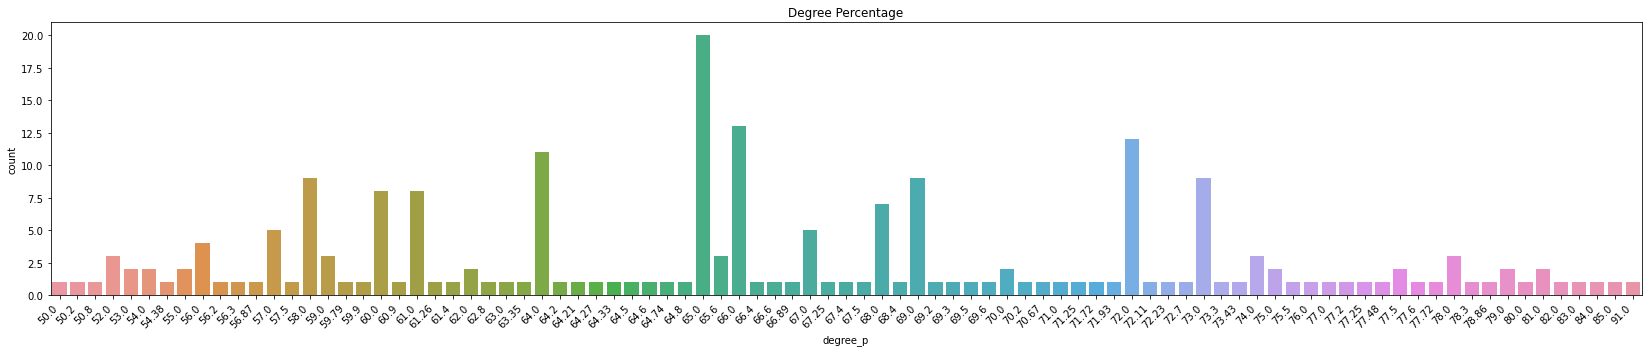

In [52]:
#  Degree Percentage
plt.figure(figsize=(23,5))
ax = sns.countplot('degree_p', data=data_n)

ax.set_title('Degree Percentage')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Degree %')

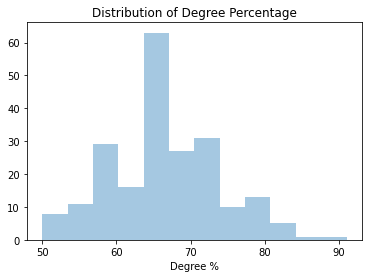

In [53]:
sns.distplot(data['degree_p'], kde=False)
plt.title('Distribution of Degree Percentage')
plt.xlabel('Degree %')

Text(10.049999999999997, 0.5, 'Degree %')

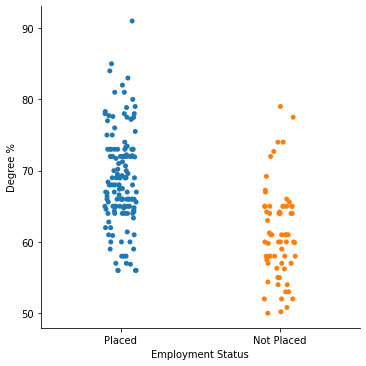

In [54]:
sns.catplot(y='degree_p', x='status', data=data_n)
plt.xlabel('Employment Status')
plt.ylabel('Degree %')

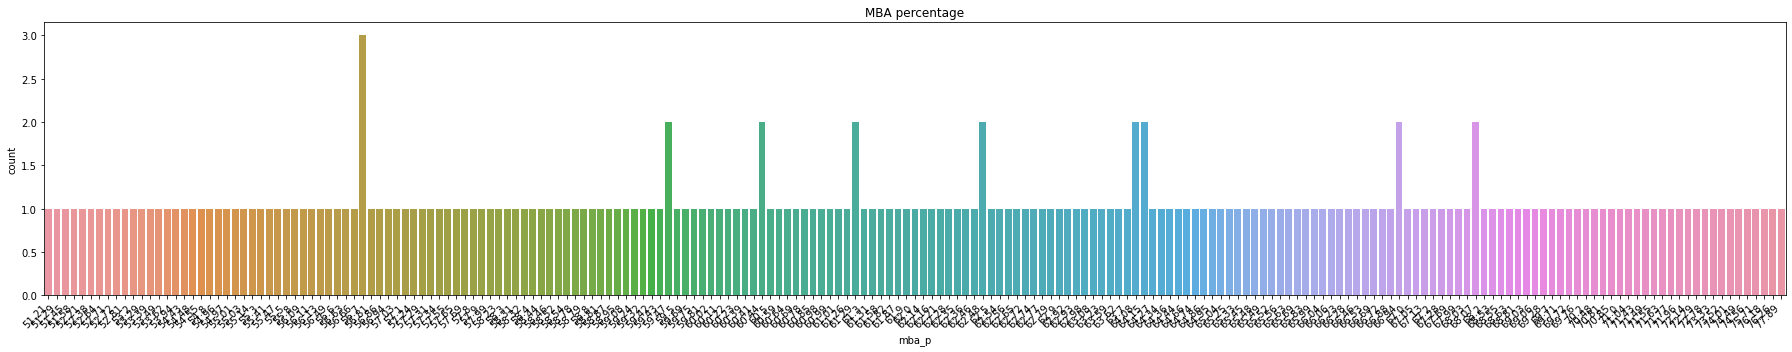

In [55]:
#MBA Percentage
plt.figure(figsize=(25,5))
ax = sns.countplot('mba_p', data=data_n)

ax.set_title('MBA percentage')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

Text(0.5, 0, 'MBA %')

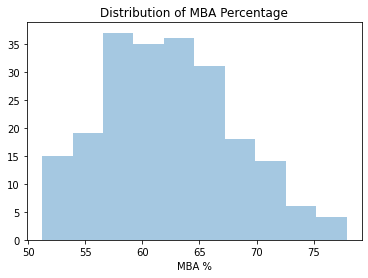

In [56]:
sns.distplot(data['mba_p'], kde=False)
plt.title('Distribution of MBA Percentage')
plt.xlabel('MBA %')

Text(10.049999999999997, 0.5, 'MBA %')

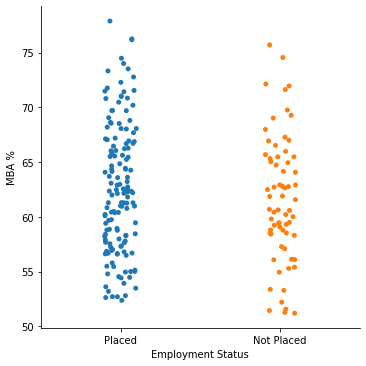

In [57]:
sns.catplot(y='mba_p', x='status', data=data_n)
plt.xlabel('Employment Status')
plt.ylabel('MBA %')

Al igual que los datos anteriores de SSC_p y HSC_p, los porcentajes de grado también son un factor importante para obtener una ubicación. 

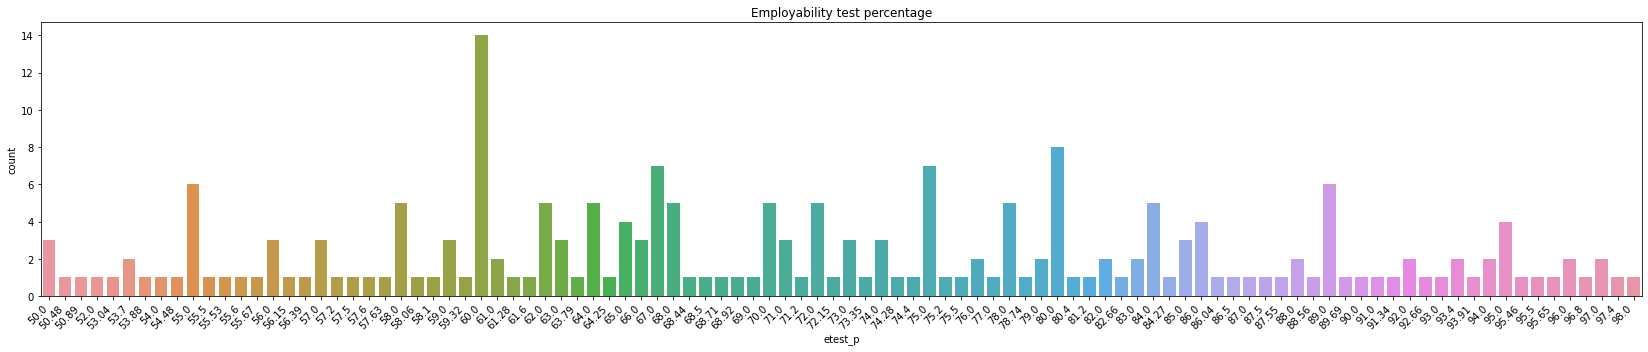

In [58]:
#Employment Test Percentage
plt.figure(figsize=(23,5))
ax = sns.countplot('etest_p', data=data_n)

ax.set_title('Employability test percentage')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Employment Test %')

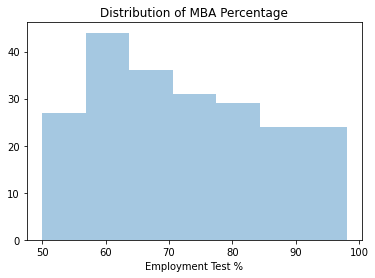

In [59]:
sns.distplot(data['etest_p'], kde=False)
plt.title('Distribution of MBA Percentage')
plt.xlabel('Employment Test %')

Text(3.674999999999997, 0.5, 'Employment Test %')

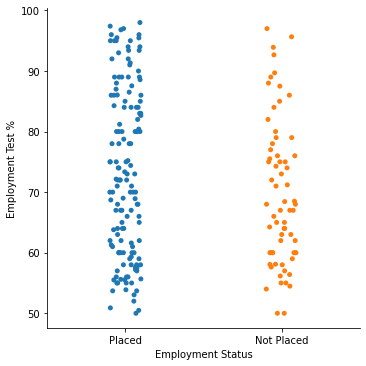

In [60]:
sns.catplot(y='etest_p', x='status', data=data_n)
plt.xlabel('Employment Status')
plt.ylabel('Employment Test %')

Dada la homogeneidad de los datos no se puede concluir para el porcentaje de prueba de empleo.


En modo de síntesis, de los datos cuantitativos se puede señalar que:


*   Claramente no tenemos detalles sobre el salario del candidato no ubicado. La función de salario por sí sola es suficiente para clasificar el estado de ubicación del candidato (si el salario es> 0, entonces no se coloca). Sin embargo, si queremos usar solo la función de salario, entonces no necesitamos aprendizaje automático para eso, solo mirando nosotros podemos hacer eso. Es por esa razon que se eliminará esta columna mientras se realiza el entrenamiento del modelo de clasificación.
*  Se concluye que los estudiantes que están ubicados tienen un porcentaje más alto en SSC (secundaria).
*  Se tiene que el porcentaje de HSC (high school) es una característica importante. Ya que todos los estudiantes ubicados tienen porcentajes más altos. 
* Al igual que los datos anteriores de SSC_p y HSC_p, los porcentajes de grado también son un factor importante para obtener una ubicación. 
* Dada la homogeneidad de los datos no se puede concluir ni para el porcentaje de prueba de empleo ni para porcentaje de MBA.

### 3.3.   *Análisis de relacion de datos*


Como ya se analizaron datos por separados, ahora se veran más graficos que nos den más información de como se comportan los datos.

<ipython-input-61-6f1d727687d9>:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


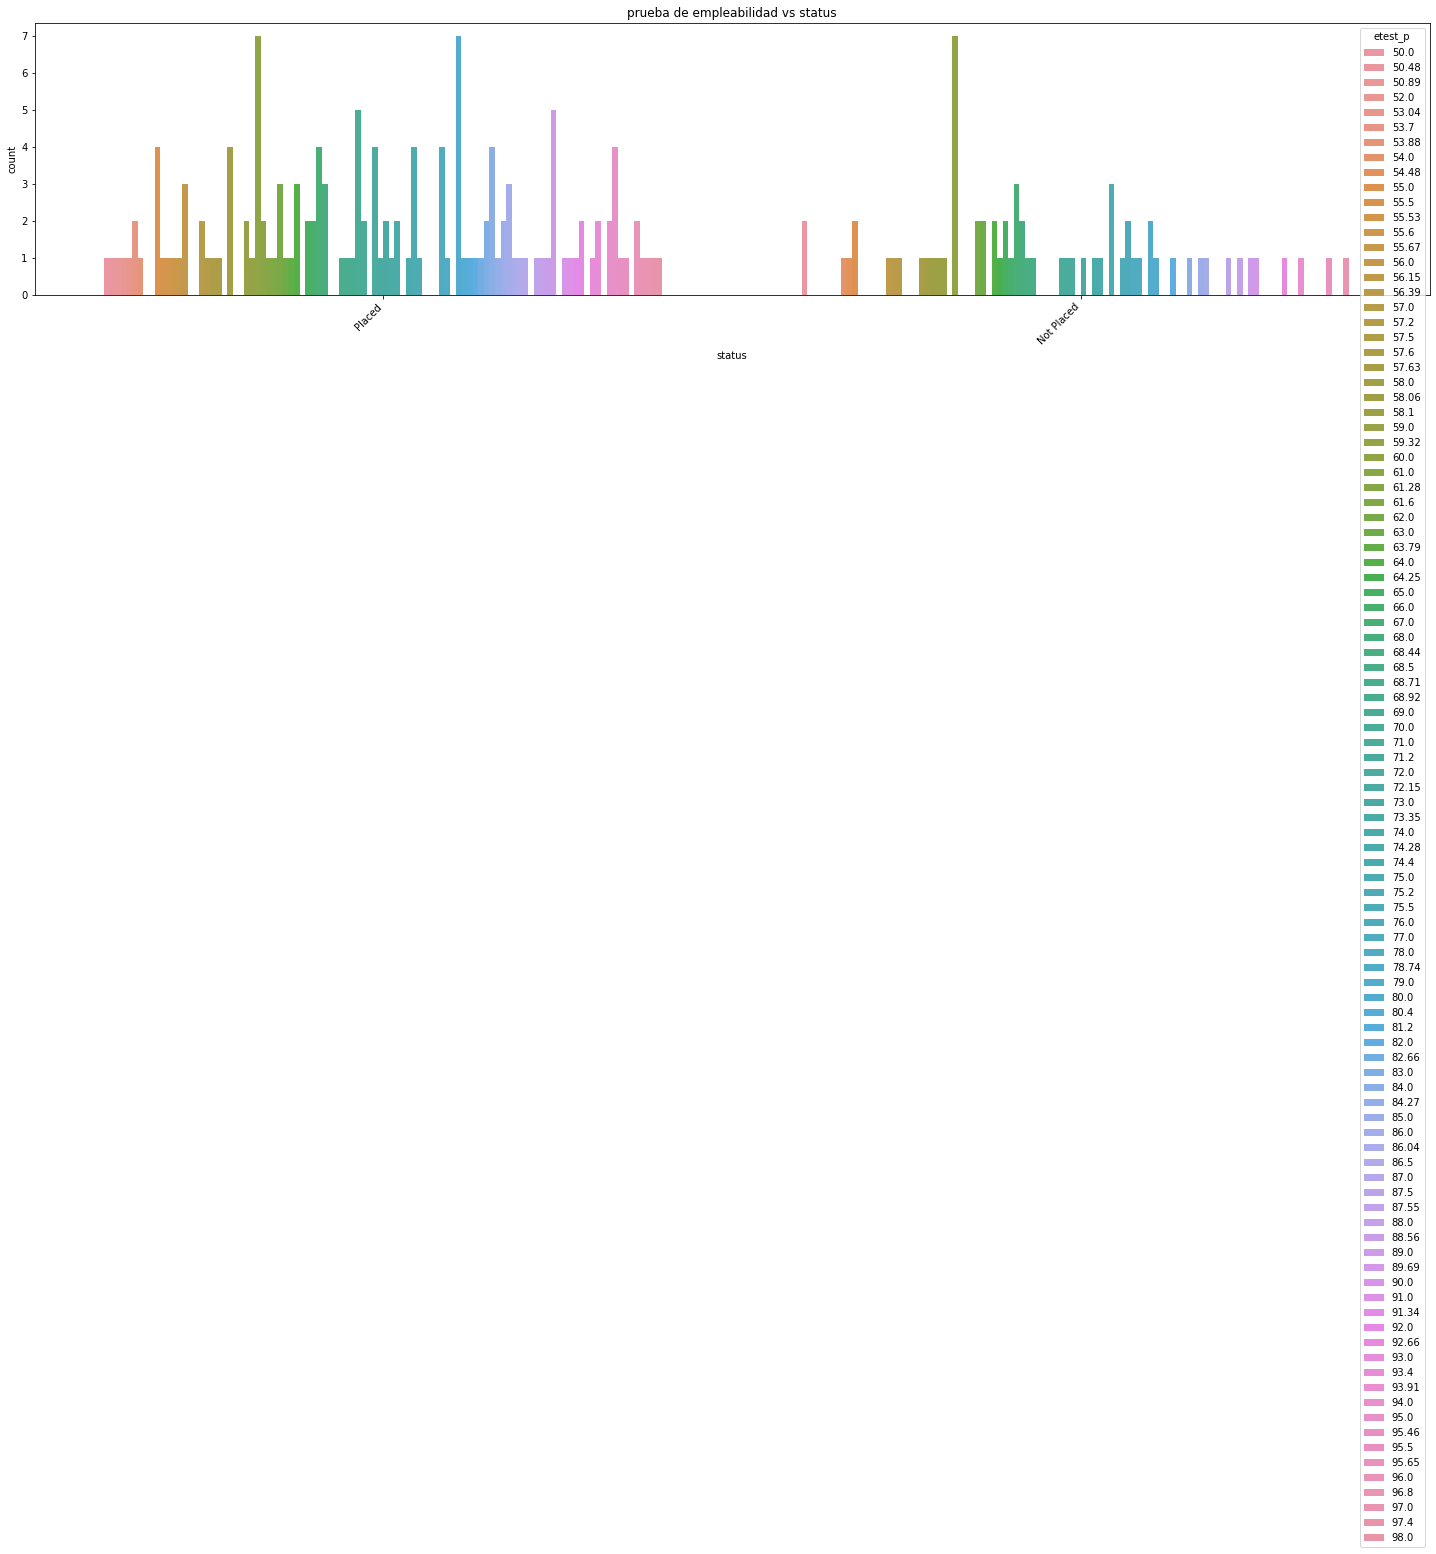

In [61]:
#prueba de empleabilidad
plt.figure(figsize=(25,5))
ax = sns.countplot(x='status', hue='etest_p', data=data_n)

ax.set_title('prueba de empleabilidad vs status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

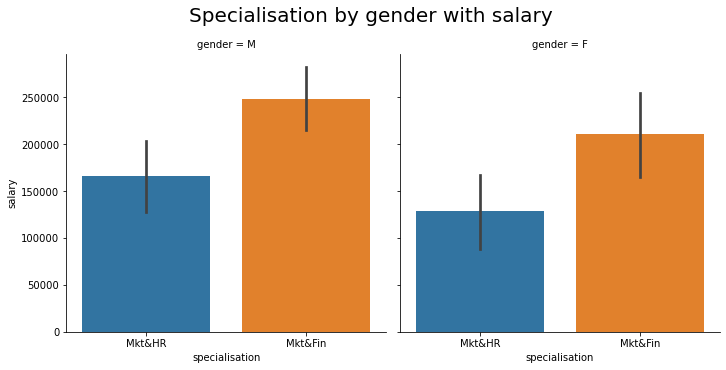

In [62]:
g = sns.catplot(data=data_n, x="specialisation", y='salary', col='gender', kind ='bar')

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Specialisation by gender with salary', size=20)
plt.show()

Se concluye que en general la especialidad Mkt&Fin suele tener mayores sueldos en ambos géneros.


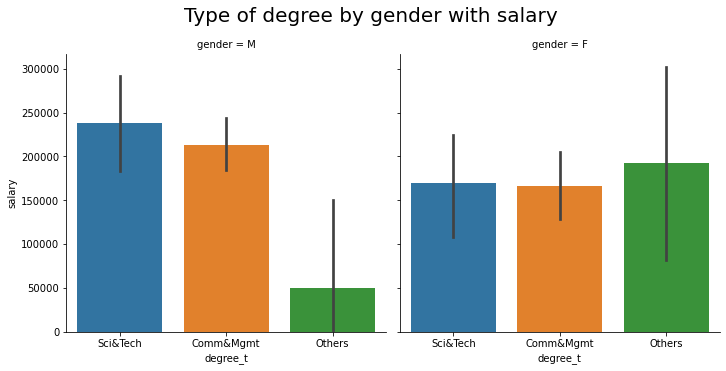

In [63]:
g = sns.catplot(data=data_n, x="degree_t", y='salary', col='gender', kind ='bar')

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Type of degree by gender with salary', size=20)
plt.show()

En hombres los grados de Sci&Tech ganan más que las otras especializaciones siendo Others con el menor sueldo.

Mientras que en mujeres, Others tiene los mayores sueldos.

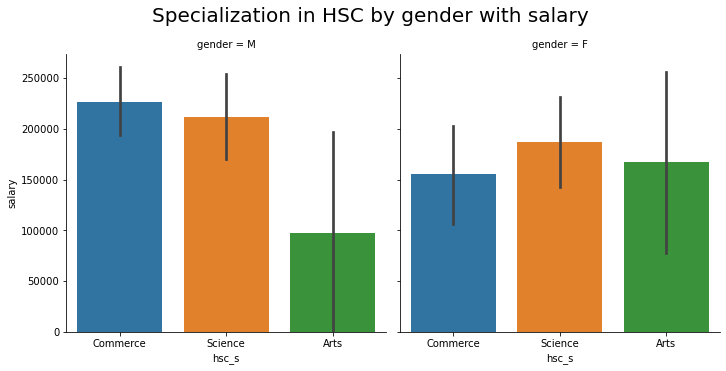

In [64]:
g = sns.catplot(data=data_n, x="hsc_s", y='salary', col='gender', kind ='bar')

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Specialization in HSC by gender with salary', size=20)
plt.show()

Se tiene que el sueldos de varones esta inclinado a Science y Commerce, mientras que en mujeres el sueldo más alto es Commerce.

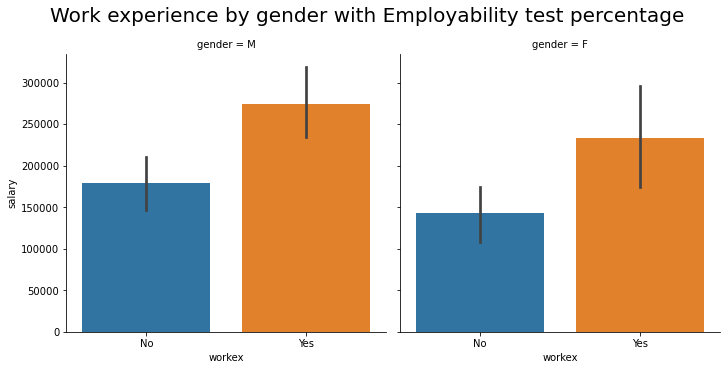

In [65]:
g = sns.catplot(data=data_n, x="workex", y='salary', col='gender', kind ='bar')


g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Work experience by gender with Employability test percentage ', size=20)
plt.show()

En mujeres se aprecia que al tener experiencia tienen mayor porcentaje de empleabilidad, mientras que en hombres los valores son homogéneos.

### ***4.- Preprocesamiento***
En esta sección se verán las correlaciones entre los datos

In [66]:
data_n.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


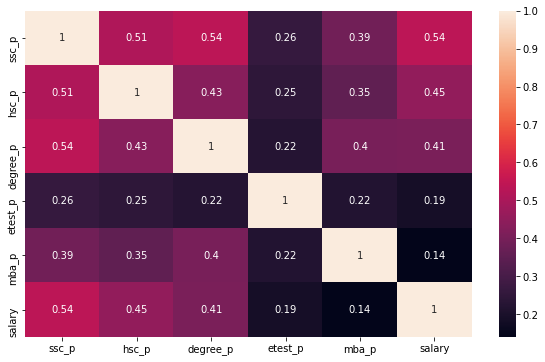

In [67]:
# Calculate correlations
corr = data_n.corr()
 
# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True)
plt.show()

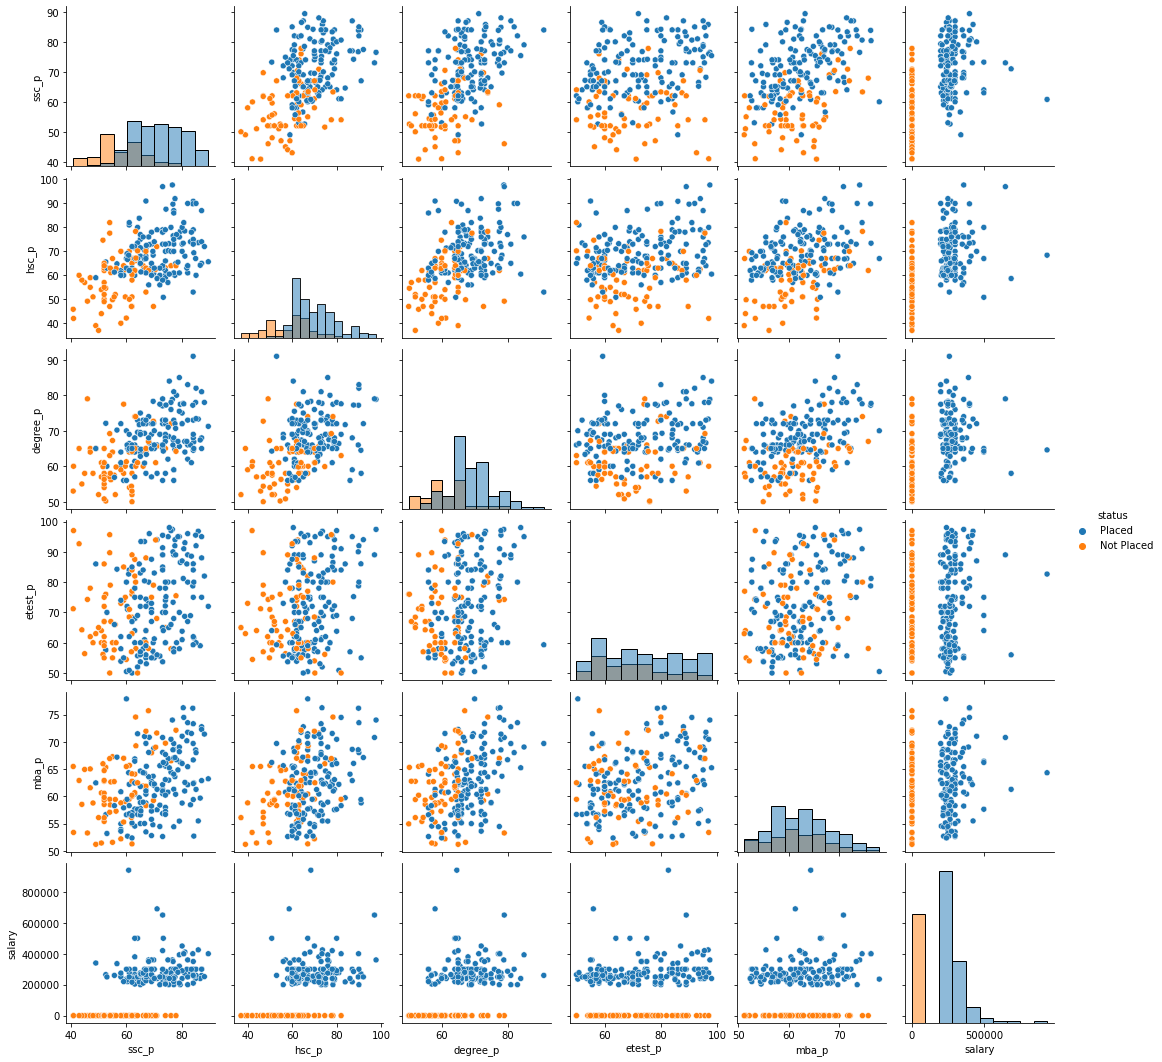

In [68]:
sns.pairplot(data=data_n[['ssc_p','hsc_p','degree_p', 'etest_p','mba_p','salary', 'status']], hue="status", diag_kind='hist')

Tal como se manifesto en el análisis anterior de variables, se eliminaran todas las columnas que no entregen información relevante al modelo.

In [69]:
data_c = data.fillna(0)
data_c = data_c.drop(['sl_no'], axis=1)
data_c.drop(['ssc_b','hsc_b', 'hsc_s', 'degree_t', 'salary'], axis=1, inplace=True)
data_c.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,M,67.00,91.00,58.00,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,78.33,77.48,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,68.00,64.00,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,52.00,52.00,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,73.60,73.30,No,96.8,Mkt&Fin,55.50,Placed


Pasaremos las variables cualitativas a variables cuantitativas, para eso modificaremos el data_n


In [70]:
data_c['gender'] = data_n.gender.map({"M":0,"F":1})
data_c["workex"] = data_n.workex.map({"No":0, "Yes":1})
data_c["status"] = data_n.status.map({"Not Placed":0, "Placed":1})
data_c["specialisation"] = data_n.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

In [71]:
data_n.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Y ahora realizaremos el mismo analisis de correlacion para este nuevo data.

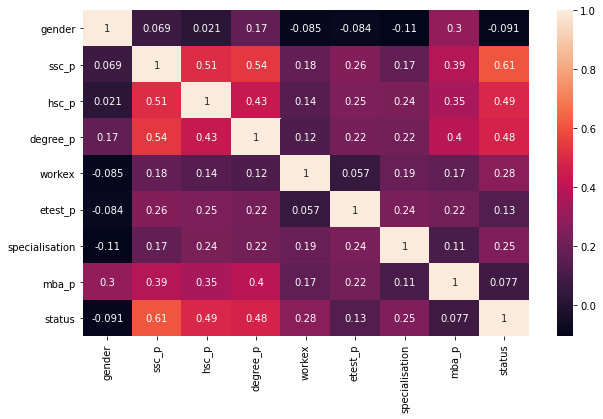

In [72]:
# Calculate correlations
corr = data_c.corr()
 
# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True)
plt.show()

Además de todo el preprocesamiento anterior, se presentan algunas funciones que serán utiles en lo que sigue.

In [73]:
def new_features(df):
    df['hsc_to_ssc'] = df['hsc_p'] / df['ssc_p']
    df['degree_to_hsc'] = df['degree_p'] / df['hsc_p']
    df['degree_to_ssc'] = df['degree_p'] / df['ssc_p']
    df['mba_to_degree'] = df['mba_p'] / df['degree_p']
    df['mba_to_etest'] = df['mba_p'] / df['etest_p']
        
    return df

In [74]:
data = new_features(data_c)

### ***5.- Selección de modelo, métricas y análisis de resultados***
Ahora que los datos están listos para preparar el modelo para predecir la solución. 
Se utilizaran los siguientes modelos:
* KNN Classification
* Decision Tree Classification
* Random Forest
* Linear SVC

https://www.kaggle.com/themlphdstudent/campus-recruitment-eda-classification

https://www.kaggle.com/sanchitakarmakar/campus-recruitment-prediction-100-accuracy

In [75]:
# Seperating Features and Target
X = data_c.copy().drop(['status'], axis=1)
y = data['status']

In [76]:
# scale each features
X_scaled = preprocessing.scale(X)

In [77]:
#Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.3)
X_train.shape, Y_train.shape, X_test.shape

((150, 13), (150,), (65, 13))

### 5.1.   *KNN Classification*



In [78]:
model=KNeighborsClassifier()
param = {
    'n_neighbors': range(1,20),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev'),}  
model_grid_KNN=GridSearchCV(estimator=model,param_grid=param)
model_grid_KNN.fit(X_train,Y_train)
print('Los mejores parametros son: ', model_grid_KNN.best_params_)
print('La precisión es de: ', model_grid_KNN.best_score_)

Los mejores parametros son:  {'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
La precisión es de:  0.86


In [79]:
# k-nearest neighbor
knn = model_grid_KNN.best_estimator_
knn.fit(X_train, Y_train)
knn_Y_pred = knn.predict(X_test)
knn_accuracy = knn.score(X_test, Y_test)
knn_accuracy

0.8769230769230769

In [80]:
y_true =  list(Y_test)
y_pred_KNN = list(model_grid_KNN.best_estimator_.predict(X_test))

In [81]:
df_temp = pd.DataFrame({ 'y':y_true, 'yhat':y_pred_KNN })
df_metrics1 = summary_metrics(df_temp)
print("\nMetricas para los regresores")
df_metrics1


Metricas para los regresores


,accuracy,recall,precision,fscore
0,0.8769,0.8344,0.8787,0.8513


In [82]:
conf_mat = confusion_matrix(Y_test, knn_Y_pred) 
fig = plt.figure(figsize=(10,7))


<Figure size 720x504 with 0 Axes>

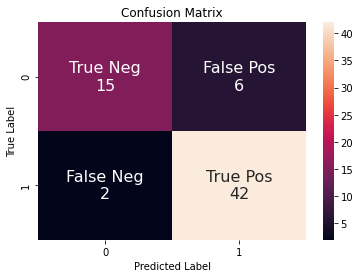

In [83]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix") 
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 5.2.   *Decision Tree Classification*



In [84]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
param = {
    'criterion': ('gini','entropy'),
    'max_depth': (20,40,1),
    'max_features':  ("auto", "sqrt", "log2"),
    }  
model_grid_DT=GridSearchCV(estimator=model,param_grid=param)
model_grid_DT.fit(X_train,Y_train)
print('Los mejores parametros son: ', model_grid_DT.best_params_)
print('La precisión es de: ', model_grid_DT.best_score_)

Los mejores parametros son:  {'criterion': 'entropy', 'max_depth': 40, 'max_features': 'sqrt'}
La precisión es de:  0.7933333333333333


In [85]:
y_true =  list(Y_test)
y_pred = list(model_grid_DT.best_estimator_.predict(X_test))

In [86]:
df_temp = pd.DataFrame({ 'y':y_true, 'yhat':y_pred })
df_metrics2 = summary_metrics(df_temp)
print("\nMetricas para los regresores")
df_metrics2


Metricas para los regresores


,accuracy,recall,precision,fscore
0,0.8,0.7652,0.7722,0.7684


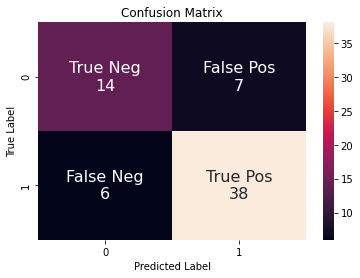

In [87]:
conf_mat = confusion_matrix(Y_test, model_grid_DT.best_estimator_.predict(X_test))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 5.3.   *Random Forest*

In [89]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
param = {
    'n_estimators': range(95,100),
    'criterion':("gini", "entropy"),
    'max_depth':  range(1,5),
    'max_features':("auto", "sqrt", "log2"),
    }  
model_grid_RF=GridSearchCV(estimator=model,param_grid=param)
model_grid_RF.fit(X_train,Y_train)
print('Los mejores parametros son: ', model_grid_RF.best_params_)
print('La precisión es de: ', model_grid_RF.best_score_)

Los mejores parametros son:  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 96}
La precisión es de:  0.8533333333333333


In [90]:
y_true =  list(Y_test)
y_pred = list(model_grid_RF.best_estimator_.predict(X_test))


In [91]:
df_temp = pd.DataFrame( { 'y':y_true, 'yhat':y_pred } )

df_metrics3 = summary_metrics(df_temp)
print("\nMetricas para los regresores")
print("")
df_metrics3


Metricas para los regresores



,accuracy,recall,precision,fscore
0,0.9231,0.8934,0.9297,0.9084


In [92]:
conf_mat = confusion_matrix(Y_test, model_grid_RF.best_estimator_.predict(X_test))
fig = plt.figure(figsize=(10,7))

<Figure size 720x504 with 0 Axes>

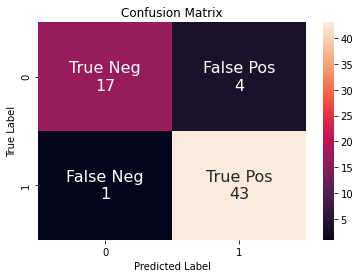

In [93]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 5.4.   *Linear SVC*

In [94]:
# Linear SVC
from sklearn import svm
from sklearn.svm import SVC
model = svm.SVC()
params = {'kernel' :('linear','poly','rbf', 'sigmoid') , 'C':range(1,10)}
model_grid_SVC = GridSearchCV(estimator = model, param_grid = params)
model_grid_SVC.fit(X_train, Y_train)
print('Los mejores parametros son: ', model_grid_SVC.best_params_)
print('La precisión es de: ', model_grid_SVC.best_score_)

Los mejores parametros son:  {'C': 5, 'kernel': 'linear'}
La precisión es de:  0.8866666666666667


In [95]:
y_true =  list(Y_test)
y_pred = list(model_grid_SVC.best_estimator_.predict(X_test))

In [96]:
df_temp = pd.DataFrame({'y':y_true,'yhat':y_pred})

df_metrics4 = summary_metrics(df_temp)
print("\nMetricas para los regresores")
print("")
df_metrics4


Metricas para los regresores



,accuracy,recall,precision,fscore
0,0.8769,0.8718,0.8556,0.8626


In [97]:
# creating confusion matrix heatmap

conf_mat = confusion_matrix(Y_test, model_grid_SVC.best_estimator_.predict(X_test))
fig = plt.figure(figsize=(10,7))

<Figure size 720x504 with 0 Axes>

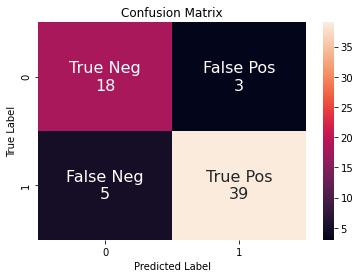

In [98]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 5.5.   *Buscando el mejor modelo*

In [99]:
comparacion = []
comparacion.append(df_metrics1)
comparacion.append(df_metrics2)
comparacion.append(df_metrics3)
comparacion.append(df_metrics4)
comparacion = pd.concat(comparacion)
comparacion['Modelo'] = ['KNN Classification','Decision Tree Classification','Random Forest','Linear SVC']
comparacion

,accuracy,recall,precision,fscore,Modelo
0,0.8769,0.8344,0.8787,0.8513,KNN Classification
0,0.8000,0.7652,0.7722,0.7684,Decision Tree Classification
0,0.9231,0.8934,0.9297,0.9084,Random Forest
0,0.8769,0.8718,0.8556,0.8626,Linear SVC


De esto podemos apreciar que el mejor modelo sería KNN

### ***6.- Visualizaciones del modelo***

In [140]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(model_grid_RF.best_estimator_, X_test, Y_test)

AttributeError: type object 'RocCurveDisplay' has no attribute 'from_estimator'

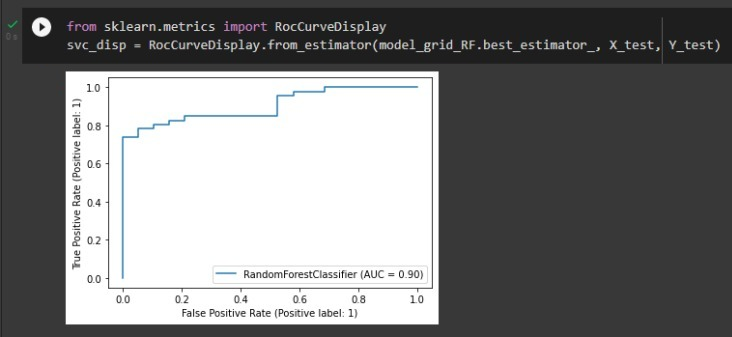

### ***7.- Conclusiones*** 

En conlusion y respondiendo las preguntas que motivan la investigación podemos afirmar que:

* ¿Qué factor influyó en un candidato para ser colocado?

Del análisis anterior podemos asegurar que las variabes que influyen en que un candidato sea ubicado son: género, especialidad, experiencia, tipo de grado.

* ¿Importa el porcentaje para que uno se coloque?

No, el análisis realizado, muestra que la prueba de empleabilidad no es confiable, no así la secundaria o el high school.

* ¿Qué grado de especialización es muy demandado por las empresas?
Respecto al tipo de grado el más demandado es Comm&Mgmt que es Administración y Comercio, respecto a la especialización la más demandada es Mkt&Fin que es marketing y finanzas. Por el que la especialización más demandada es comercio.


### ***8.- Redes Neuronales*** 

Comenzamos importando tensorflow para crear nuestra red neuronal

In [111]:
import tensorflow as tf
from tensorflow import keras

ModuleNotFoundError: No module named 'tensorflow'

A continuación, dado que es un problema de clasificación binario, modificamos la columna a predecir para tener un 1 en la columna que represente si quedo o no.

In [112]:
y = pd.get_dummies(y)
#Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.3)
X_train.shape, Y_train.shape, X_test.shape

((150, 13), (150, 2), (65, 13))

In [113]:
n_features = X_train.shape[1]
n_classes = 2

In [114]:
#Crear capas de la red neuronal
inputs = tf.keras.Input(shape=(n_features, ), name='Input_3_features')
x = tf.keras.layers.Dense(15, activation='relu')(inputs)
x = tf.keras.layers.Dense(20, activation='relu')(x)
x = tf.keras.layers.Dense(25, activation='relu')(x)
outputs = tf.keras.layers.Dense(n_classes, activation='softmax', name='Output')(x)
model1 = tf.keras.Model(inputs=inputs, outputs=outputs, name='ModeloFuncRandomClass')
model1.summary()# Permite ver la cantidad de parametros de la red

NameError: name 'tf' is not defined

In [115]:
tf.keras.utils.plot_model(model1, show_shapes=True) #Permite visualizar la red

NameError: name 'tf' is not defined

In [116]:
# Compilar el modelo. Se utiliza loss Categorical Crossentropy y métrica Accuracy
model1.compile(loss=tf.losses.categorical_crossentropy, metrics=['accuracy'])

NameError: name 'model1' is not defined

In [117]:
# Entrenar modelo
history = model1.fit(
    x = X_train,
    y = Y_train,
    epochs=100,
    verbose=False,
)

NameError: name 'model1' is not defined

NameError: name 'history' is not defined

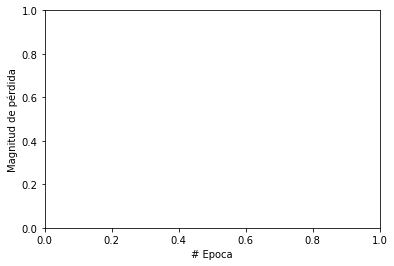

In [118]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(history.history["accuracy"])

In [119]:
Y_pred = model1.predict(X_test)

# Obtener clase con activación más alta (mayor probabilidad) para todas las predicciones. 
Y_pred = np.argmax(Y_pred, axis=1)

print(Y_pred[0:20])

# Encodear como one-hot para comparar con el output esperado
Y_pred = tf.one_hot(Y_pred, depth=2).numpy()

print()
print(Y_pred[0:20])

NameError: name 'model1' is not defined

In [120]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Visualizar el accuracy y demás
print("Model Accuracy sobre conjunto Test: ")
print(accuracy_score(Y_test, Y_pred))

target_names = [str(i) for i in range(2)]


np.set_printoptions(precision=2)
print(classification_report(Y_test, Y_pred))

Model Accuracy sobre conjunto Test: 


NameError: name 'Y_pred' is not defined